In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Dataset

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [8]:
num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

ctg_cols = ['ocean_proximity']

In [9]:
enumerate(num_cols)

In [10]:
a = np.array([[9,1,1], [2,2,2]])
a.flatten()

array([9, 1, 1, 2, 2, 2])

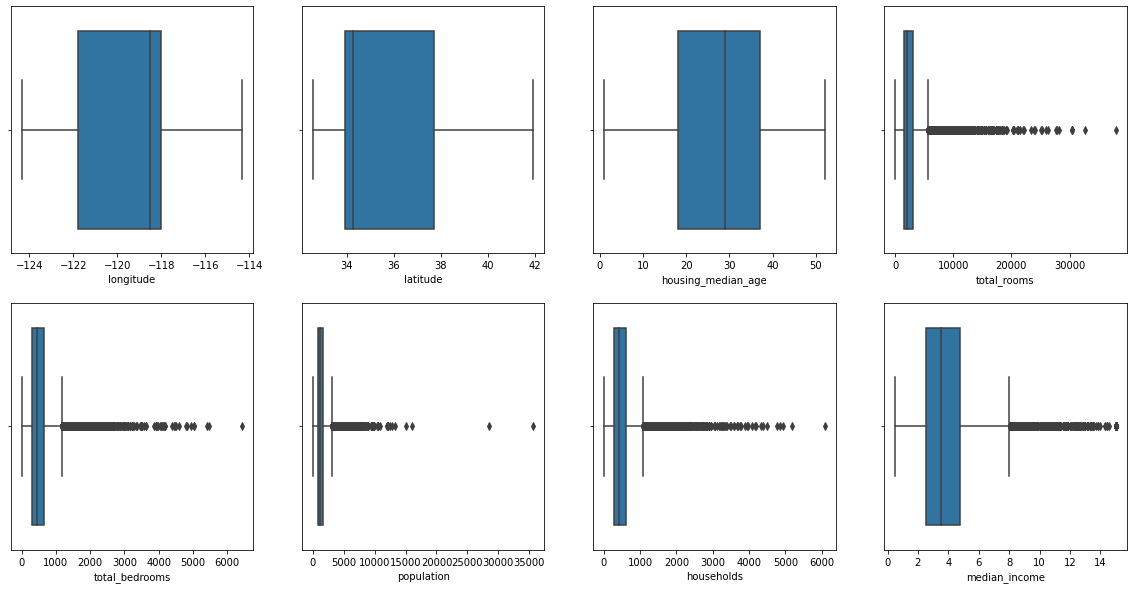

In [11]:
fig, ax = plt.subplots(2,4, figsize=(20,10))

for ix, col in enumerate(num_cols):
    sns.boxplot(x=col, data=X_train, ax=ax.flatten()[ix])

In [14]:
sns.boxplot(x='median_house_value', data=X_train)

In [13]:
sns.pairplot(X_train[num_cols + ['median_house_value']])

'longitude' & 'latitude' won't be used as the value will be relatively unique for every data point.

# Preparation

- missing values
    - total_bedrooms
    
- scaling
    - robust 
    
- encoding
    - ocean_proximity: onehot

In [15]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

# impute missing horsepower
total_bedrooms_median_train = X_train['total_bedrooms'].median()
X_train['total_bedrooms'].fillna(value=total_bedrooms_median_train, inplace=True)
X_test['total_bedrooms'].fillna(value=total_bedrooms_median_train, inplace=True)

# scaling
scaler = RobustScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_cols])
X_test_num_scaled = scaler.transform(X_test[num_cols])

# encoding
encoder = OneHotEncoder()
X_train_ctg_encoded = encoder.fit_transform(np.array(X_train['ocean_proximity']).reshape(-1,1)).toarray()
X_test_ctg_encoded = encoder.transform(np.array(X_test['ocean_proximity']).reshape(-1,1)).toarray()

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
X_train_prep = np.concatenate([X_train_num_scaled, X_train_ctg_encoded], axis=1)
X_test_prep = np.concatenate([X_test_num_scaled, X_test_ctg_encoded], axis=1)

In [18]:
# univariate feature selection
# model-based feature selection
# iterative feature selection

- regression, continuous --> f_regression
- regression, categorical --> mutual_info_regression
- classification, continuous --> f_classif
- classification, categorical --> chi2

## Univariate Statistics Feature Selection

In [19]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, mutual_info_regression

X_train_prep_num = X_train_prep[:, :6]
X_train_prep_ctg = X_train_prep[:, 6:]

# select 3 cont. features
k_feature_selector = SelectKBest(score_func=f_regression, k=3)
k_feature_selector.fit(X_train_prep_num, y_train)
X_train_prep_num_selected = k_feature_selector.transform(X_train_prep_num)

# select ctg. features
k_feature_selector_ctg = SelectKBest(score_func=mutual_info_regression, k=1)
k_feature_selector_ctg.fit(X_train_prep_ctg, y_train)
X_train_prep_ctg_selected = k_feature_selector_ctg.transform(X_train_prep_ctg)

In [20]:
# X_train_prep_best = np.concatenate([X_train_prep_num_selected, X_train_prep_ctg_selected], axis=1)

## Model-based Feature Selection

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)
lin_reg.score(X_train_prep, y_train)

0.6439357679582443

In [22]:
encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

<AxesSubplot:xlabel='coef_abs', ylabel='feature'>

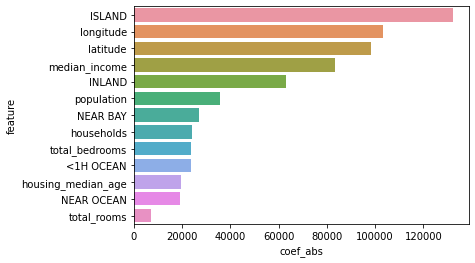

In [23]:
df_coef = pd.DataFrame({
    'feature': num_cols + encoder.categories_[0].tolist(),
    'coef': lin_reg.coef_
})

df_coef['coef_abs'] = df_coef['coef'].apply(abs)

sns.barplot(x='coef_abs', y='feature', data=df_coef.sort_values(by='coef_abs', ascending=False))

In [24]:
best_features = df_coef.sort_values(by='coef_abs', ascending=False)[:3]
best_features

,feature,coef,coef_abs
10,ISLAND,132200.927013,132200.927013
0,longitude,-103457.611758,103457.611758
1,latitude,-98262.529550,98262.529550


## Iterative Feature Selection

### Backward

In [25]:
from sklearn.feature_selection import RFE

lin_reg = LinearRegression()
backward_selector = RFE(lin_reg, n_features_to_select=5)
backward_selector.fit(X_train_prep, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [26]:
num_cols + encoder.categories_[0].tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [27]:
backward_selector.get_support()

array([ True,  True, False, False, False, False, False,  True, False,
        True,  True, False, False])

- longitude
- latitude
- median_income
- inland
- island